<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Textmining(Elonmusk).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
path = r"/content/Elon_musk.csv"
pathpos = r"/content/positive-words.txt"
pathneg = r"/content/negative-words.txt"
pathsto = r"/content/stop.txt"

In [12]:
data = pd.read_csv(path)

In [13]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    words = word_tokenize(text)

    stop_words_set = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words_set]

    preprocessed_text = " ".join(filtered_words)

    return preprocessed_text

In [14]:
data['Text'] = data['Text'].apply(preprocess_text)

In [15]:
with open(pathpos, "r") as f:
    positive_words = [line.strip() for line in f]

with open(pathneg, "r") as f:
    negative_words = [line.strip() for line in f]

with open(pathsto, "r") as f:
    stop_words = [line.strip() for line in f]

In [16]:
def get_sentiment(tweet):
    words = tweet.split()
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)

    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['Text'].apply(get_sentiment)

In [17]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mon', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [18]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['Sentiment'], test_size=0.2, random_state=42)

In [19]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred = model.predict(X_test)

In [21]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6810551558752997
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        44
     neutral       0.67      0.99      0.80       263
    positive       0.92      0.21      0.34       110

    accuracy                           0.68       417
   macro avg       0.53      0.40      0.38       417
weighted avg       0.66      0.68      0.59       417



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data['Sentiment'] == 'positive']['Text']))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data['Sentiment'] == 'negative']['Text']))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data[data['Sentiment'] == 'neutral']['Text']))


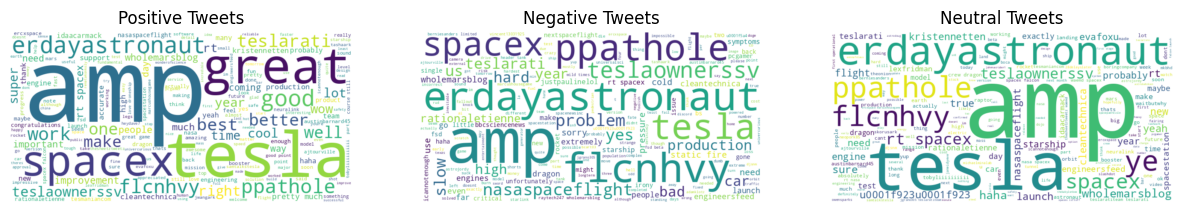

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Tweets")
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Tweets")
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Tweets")
plt.show()